<a href="https://colab.research.google.com/github/agus-astolfo/Data_Science_I/blob/main/ProyectDS_ParteIII_Astolfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ENTREGA FINAL DATA SCIENCE 1**




##**Dataset de "Predicción del riesgo de ataque cardíaco"**





###**Resumen de la problemática**

Las enfermedades cardiovasculares siguen siendo una de las principales causas de mortalidad en el mundo, y dentro de ellas, el infarto agudo de miocardio (IAM) representa un desafío significativo para la salud pública. Por lo tanto, buscar indicadores o predictores de la enfermedad utilizando analisis predictivo o maching learning con el fin de modificar conductas, para minimizar los riesgos y mejorar los tratamientos actuales, es de gran ayuda el sistema de salud tanto a nivel de investigación como clínico.

Este estudio se basa en un conjunto de datos obtenido de la plataforma Kaggle ([enlace al dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset)), que contiene diversos atributos, que van desde la identidicación del paciente, sexo, edad, hábitos - tabaquismo, consumo de alcohol, alimentación, ejercicio, etc-, parámetros de clinicos y del laboratorio - presión arterial, ritmo cardíaco, concentración de colesterol, etc-, datos demográficos -pais de residencia, hemisferios, etc-, entre otros, con el fin de establecer que relación o relaciones existen entre ellas que puedan predecir la probabilidad de padecer IAM.

Utilizando herramientas como analisis predictivo y machine learning, se busca establecer o identificar patrones que ayuden a mejorar el conocimiento de la problemática (IAM) y de esta forma reconocer posibles puntos de intervencieon al identificar indicadores. Explorar estas relaciones no solo puede ayudar a reforzar el conocimiento sobre la enfermedad, sino también a diseñar herramientas predictivas que contribuyan a la toma de decisiones médicas, optimizando estrategias de prevención y tratamiento para reducir el riesgo en pacientes con predisposición.


##**Metodología de Análisis**

La metodología a utilizar en el presente proyecto es la siguiente:

*   Se presentan los datos a analizar en la sección *Análisis exploratorio inicial*, donde se utilizan herramientas de descripción de datos y se especifican cúales son y que significan los atributos. Además, en la subsección *Destinatarios de uso* se especifica de forma justificada quienes son estos.

*   Se continua detallando el objetivo (sección *Objetivo*), donde se explica cúal el es propósito del trabajo.

*  Para poder realizar el modelo de aprendizaje supervisado se requieren transformar o limpiar algunos datos, esto se observa en dicha sección, donde se crean, reordenan y eliminan columnas, asi como, se transforman datos de tipo objeto a número.

*   Se definien las características (variable ***X***) y la variable objeto (***y***).

*   Posterior a esto se realiza la selección de variables con **SecuentialFeatureSelector (SFS)**, con el fin de buscar las mejores variables. Esto de utiliza para un modelo de Regresión Logística y para uno de árbol de decisión.

*   Luego con las varaibles seleccionadas para cada modelo se realiza el entrenamiento y testeo.

*   Se comparan los resultados de precisión de ambos modelos.

*   A continuación se realiza la interpretación gráfica de ambos modelos.

*  Finalmente, se realiza una conclusión (sección *Conclusión*) que busca responder al objetivo planteado, en función de los resultados obtenidos.

##**Análisis exploratorio inicial**

Se realiza un análisis exploratorio inicial donde se muestra un resumen del dataset (DS) y se realiza una descripcion mínima del mismo.

###**Importación de librerias y acceso al dataset desde GitHub**

Primero se importan las librerias a utilizar siguiendo el siguiente código:

In [ ]:
#Importar librerias
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


Luego se procede a tener acceso al DS corriendo el siguiente código, utilizando una dirección *url* del raw data del repositorio de GitHub, de esta forma no se requiere que tercerros tengan que tener acceso a la cuenta de Google Drive para poder correr los códigos. Este código permite que la notebook lea el archivo .csv que se utilizará como DS. Tener en cuenta que la presente notebook se guardara en el mismo repositorio de GitHub.


In [ ]:
url='https://raw.githubusercontent.com/agus-astolfo/Data_Science_I/refs/heads/main/heart_attack_prediction_dataset.csv'
df_harp= pd.read_csv(url, sep=',')

###**Exploración de datos**

Utilizando los métodos *.head* , *.tail*, *.info* y *.shape*se observa un resumen de la
información que contiene el DS.

In [ ]:
df_harp.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
df_harp.tail()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0
8762,ZWN9666,25,Female,356,138/67,75,1,1,0,0,...,9.005234,247338,32.914151,180,7,4,United Kingdom,Europe,Northern Hemisphere,1


In [ ]:
df_harp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
df_harp.shape

(8763, 26)

Se puede observar que el DS se compone de 8763 registros con 26 atributos y que no contiene datos nulos.

Para confirmar que no existen datos nulos en el set de datos a utilizar, se corre el comando de código *.isnull (). sum()*.

In [ ]:
datos_nulos = df_harp.isnull().sum() #cuenta la cantidad de datos nulos por cada columna y los suma.
print(datos_nulos)

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


###**Descripción de los atributos**


Se explicará brevemente cuales son los atributos y que significan cada uno de ellos:

*   ***Patient ID***: identificador univoco del paciente.
*   ***Age***: edad del paciente en años.
*   ***Sex***: genero del paciente (M= maculino, F=femenino).
*   ***Cholesterol***: nivel o concentración (mg/dL) de colesterol en suero del paciente.
*   ***Blood Pressure***: Presión atererial (sistólica/diasteolica).
*   ***Heart Rate***: ritmo cardíaco, medido en pulsaciones por minuto.
*   ***Diabetes***: si el paciente tiene (Y=Yes/Si) o no tiene (N=no) diabetes.
*   ***Family History***: si tiene o no tiene antecedentes familiares de enfermedad cardíaca (1=Yes/Si, 0=No)
*   ***Smoking***: status de tabaquismo del paciente (fumador =1, no fumador =0)
*  ***Obesity***: status de obesidadd del paciente (obeso =1, no obeso =0).
*   ***Alcohol Consuption***: Nivel de consumo de alcohol por el paciente (none [no consume]/Light[bajo consumo]/Moderate[consumo moderado]/Heavy[alto consumo])
*   ***Exercise Hours Per Week***: cantidad o número de horas que realiza ejercicio por semana.
*   ***Diet***: Hábitos dietararios del paciente (Healthy [saludable]/ Average [promedio]/ Unhealthy [no saludable]).
*   ***Previous Heart Problems***: Problemas cardíacos anteriores (1=Yes/Si, 0=No).
*   ***Medication Use***: Uso de medicamentos por el paciente (1=Yes/Si, 0=No).
*   ***Stress Level***: Nivel de estrés reportado por el paciente (1-10), siendo 1 nada estresado y 10 muy estresado.
*   ***Sedentary Hours Per Day***: Cantidad de horas de actividad sedentaria por dia.
*   ***Income***: ingresos del paciente (USD$).
*   ***BMI***: indice de masa corporal.
*   ***Tryglycerides***: nivel o concentración (mg/dL) de triglicéridos en suero del paciente.
*   ***Physical Activity Days Per Week***: Cantidades de dias que el paciente realiza actividad física en la semana.
*   ***Sleep Hours Per Day***: Horas de sueño por dia.
*   ***Country***: Pais de residencia del paciente.
*   ***Continent***: Continente en el que reside el paciente.
*   ***Hemisphere:*** Hemisferio en el que reside el paciente.
*   ***Heart Attack Risk***: Presencia de riesgo de ataque cardíaco (1=Yes/Si, 0=No).














###**Destinatario de uso**

Esta destinado a brindar información relevante que ayude tanto a profesionales de la salud como a investigadores a abordar la problematica desde otra mirada, y darle herramientas para poder ayudar al pacientes desde tratamientos a conductas médicas que ayuden a prevenir el riesgo de IAM.

##**Objetivo**


El objetivo es crear un modelo de aprendizaje supervisado de clasificación que pueda predecir el riesgo de que un paciente pueda sufrir  o no IAM (ataque cardíaco), identificando que caracteristicas son las mas relevante para ser utilizadas como biomarcadores o indicadores, y poder tomar acciones preventivas.

##**Transformacíon o limpieza de datos**


En la sección *Exploración de datos* se obtuvo una noción general del contenido de los datos. Se decide que a fin de probar modelos de aprendizaje supervisado se requiere primero transformar los datos.


####**Creacíon, reordenamiento y eliminacíon de columnas**

Se puede observar que la presión arterial es un dato de tipo *Object*, y se desea transformarlo a número (tipo de dato *int*) ya que puede ser de utilidad para el modelo que se desea implementar a posterior

In [ ]:
#Dividir la columna "Blood Pressure" en "Systolic Pressure" y "Diastolic Pressure"
df_harp[['Systolic_Pressure', 'Diastolic_Pressure']] = df_harp['Blood Pressure'].str.split('/', expand=True)

#convertir los datos a tipo int
df_harp['Systolic_Pressure'] = df_harp['Systolic_Pressure'].astype(int)
df_harp['Diastolic_Pressure'] = df_harp['Diastolic_Pressure'].astype(int)

#Eliminar la columna original
df_harp.drop(columns=['Blood Pressure'], inplace=True)

In [ ]:
df_harp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

Como las columnas creadas se ubican al final del dataframe, se decide cambiar la posición a donde se encontraba la original (posición 4)

In [ ]:
#reordenamiento de los atributos creados
df_harp.insert(4, 'Systolic_Pressure', df_harp.pop('Systolic_Pressure')) #mueve el atributo Systolic_Pressure a la posicion 4
df_harp.insert(5, 'Diastolic_Pressure', df_harp.pop('Diastolic_Pressure')) #mueve el atributo Systolic_Pressure a la posicion 5

In [ ]:
df_harp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Systolic_Pressure                8763 non-null   int64  
 5   Diastolic_Pressure               8763 non-null   int64  
 6   Heart Rate                       8763 non-null   int64  
 7   Diabetes                         8763 non-null   int64  
 8   Family History                   8763 non-null   int64  
 9   Smoking                          8763 non-null   int64  
 10  Obesity                          8763 non-null   int64  
 11  Alcohol Consumption              8763 non-null   int64  
 12  Exercise Hours Per W

Para poder realizarse a posterior los modelos es necesario pasar los atributos de tipo 'object' a numeros.
Primero con el siguiente código nos fijamos cuales con los atributos con tipo 'object' y si hay valores únicos en las columnas.

In [ ]:
for col in df_harp.select_dtypes(include=['object']).columns:
    print(f"Columna: {col}")
    print(df_harp[col].unique()[:10])  # el número 10 equivales a los primeros 10 valores únicos
    print("-" * 30)

Columna: Patient ID
['BMW7812' 'CZE1114' 'BNI9906' 'JLN3497' 'GFO8847' 'ZOO7941' 'WYV0966'
 'XXM0972' 'XCQ5937' 'FTJ5456']
------------------------------
Columna: Sex
['Male' 'Female']
------------------------------
Columna: Diet
['Average' 'Unhealthy' 'Healthy']
------------------------------
Columna: Country
['Argentina' 'Canada' 'France' 'Thailand' 'Germany' 'Japan' 'Brazil'
 'South Africa' 'United States' 'Vietnam']
------------------------------
Columna: Continent
['South America' 'North America' 'Europe' 'Asia' 'Africa' 'Australia']
------------------------------
Columna: Hemisphere
['Southern Hemisphere' 'Northern Hemisphere']
------------------------------


Se decide sacar la columna Patient ID ya que no representa una información importante para el objetivo que se propone en el trabajo.

In [ ]:
df_harp2=df_harp.drop(columns=['Patient ID'])

for col in df_harp2.select_dtypes(include=['object']).columns:
    print(f"Columna: {col}")
    print(df_harp2[col].unique()[:10])  # el número 10 equivales a los primeros 10 valores únicos
    print("-" * 30)

Columna: Sex
['Male' 'Female']
------------------------------
Columna: Diet
['Average' 'Unhealthy' 'Healthy']
------------------------------
Columna: Country
['Argentina' 'Canada' 'France' 'Thailand' 'Germany' 'Japan' 'Brazil'
 'South Africa' 'United States' 'Vietnam']
------------------------------
Columna: Continent
['South America' 'North America' 'Europe' 'Asia' 'Africa' 'Australia']
------------------------------
Columna: Hemisphere
['Southern Hemisphere' 'Northern Hemisphere']
------------------------------


In [ ]:
df_harp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Systolic_Pressure                8763 non-null   int64  
 4   Diastolic_Pressure               8763 non-null   int64  
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
df_harp2.shape

(8763, 26)

####**Trasformacíon de datos de tipo objeto a número**

Como las columnas en cuestión son variables categóricas, para transformar, los datos de tipo 'object' a número se pueden utilizar 2 formas dependiendo de la cantidad de categorias:
1. Label Encoder para cuando hay pocas categorias
2. One-Hot Encoding para cuando hay muchas categorías

Como las variables categóricas correspondientes a los atributos Sexo, Dieta, Pais, Continente y Hemisferio poseen pocas categorias (≤ 10) se uriliza la primera opción (Label Encoder)

In [ ]:
from sklearn.preprocessing import LabelEncoder #Se importa la libreria

# Se realiza una lista de las variables categóricas a transformar
atributos_categoricos = ['Sex', 'Diet','Country','Continent','Hemisphere']

# Se crea un LabelEncoder por cada atributo y se transforma
label_encoders = {}  # Se crea en forma de diccionario para almacenar los encoders por si despúes se requiere utilizarlos

for col in atributos_categoricos: #transformación
    label_encoders[col] = LabelEncoder()
    df_harp2[col] = label_encoders[col].fit_transform(df_harp2[col])

In [ ]:
df_harp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Systolic_Pressure                8763 non-null   int64  
 4   Diastolic_Pressure               8763 non-null   int64  
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
df_harp2.shape

(8763, 26)

In [ ]:
df_harp2.head()

,Age,Sex,Cholesterol,Systolic_Pressure,Diastolic_Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,1,208,158,88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,0,5,1,0
1,21,1,389,165,93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,3,4,0,0
2,21,0,324,174,99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,6,3,0,0
3,84,1,383,163,100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,3,4,0,0
4,66,1,318,91,88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,16,1,0,0


Si bien se conoce la variable objetivo que es "Heart Attack Risk", se decide utilizar la descripcion de columnas para que se vea de forma resumida cuales son los atributos. Esta herramienta es útil cuando no se tiene idea de cúal puede ser la columna objetivo.

In [ ]:
df_harp2.columns

Index(['Age', 'Sex', 'Cholesterol', 'Systolic_Pressure', 'Diastolic_Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

Para confirmar que no existen datos nulos en el set de datos a utilizar, se corre el comando de código *.isnull (). sum()*.

In [ ]:
datos_nulos = df_harp2.isnull().sum() #cuenta la cantidad de datos nulos por cada columna y los suma.
print(datos_nulos)

Age                                0
Sex                                0
Cholesterol                        0
Systolic_Pressure                  0
Diastolic_Pressure                 0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


##**Definicion de variables *X* e y**

En base a todo los trabajado anteriormente, para poder realizar los modelos de aprendizaje supervisado, se debe primeramente definir nuentras variables ***X*** (independiente) e ***y*** (dependiente).

La variable ***y*** en este caso es "Heart Attack Risk", que indica si una persona tiene riesgo de ataque cardiaco o IAM (1) o no lo tiene (0).

In [ ]:
X = df_harp2.drop(columns=['Heart Attack Risk'])  # Características (todas menos la variable objetivo)
y = df_harp2['Heart Attack Risk']  # Etiquetas (variable objetivo)

##**Selección de variables con *SequentialFeatureSelector* (SFS)**

Se utiliza ***SequentialFeatureSelector (SFS)*** para seleccionar dentro de todas la variables que contiene nuestreo dataset, las mejores.

---

**Explicación del método:**
- **Paso 1:** Comenzamos con un conjunto vacío de variables.
- **Paso 2:** Agregamos iterativamente las características que maximizan la precisión.
- **Paso 3:** Eliminamos aquellas que dejan de ser relevantes (`floating=True`).
- **Paso 4:** Obtenemos el mejor subconjunto de características.
---
 Fuente: archivo *SFS_Feature_selection_clasificacion.ipynb*, sección 2, brindado por el profesor.

###**SFS para modelo de Regresíon logística**

En primera instancia se aplicará **SFS** con **Regresión logística**.

Se decide utilizar este modelo ya que la variable objetivo es binaria/dicotómica y este modelo funciona bien para problemas con este tipo de clasificación. Además de ser un modelo de clasificación lineal.

---

Hay que recordar que se debe aplicar **SFS** para seleccionar características antes del entrenamiento, ya que permite selecionar las variables que despúes se sutilizaran en este.

In [ ]:
# Se importan SFS y Regresión logística
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Se deben dividir los datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Se Define el modelo de Regresión Logística, con la cantidad de iteraciones máximas, y que las clases esten balanceadas
log_model = LogisticRegression(max_iter=500, class_weight='balanced')

Cuando se instancia el modelo de regresión logistica, como sabemos de la entrega anterios que existe mas pacientes sin riesgo de IAM que con riesgo de sufrier IAM, es que se decide balancear las clases, utilizando *class_weight='balanced'*.   

Por el tipo de datos que se utiliza es recomendable la estandarización o escalado de los datos.

In [ ]:
# Se importa StandardScaler
from sklearn.preprocessing import StandardScaler

# Aplicación del Escalado previo a utilizar SFS
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Conversión a un nuevo DataFrame que se utilizara para que al aplicar SFS se reconozcan las columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Luego de realizar el escalado o estandarización de los datos, se debe realizar la seleccion secuancial de las características (SFS) siguiendo los siguientes pasos.

In [ ]:
# Este código permite que se aplique SFS para la Regresión Logística
sfs_log = SFS(log_model,
              k_features="best", # Al colocar esta opcion busca las mejores caracteristicas
              forward=True, # realiza la selección hacia adelante
              floating=True, # Puede eliminar variables no útiles
              scoring='accuracy',  # métrica del modelo
              cv=5) # realiza la validación cruzada 5 veces.

# Se debe ajustar el SFS, ultilizando el siguiente código
sfs_log.fit(X_train_scaled, y_train)

# Finalmente, se aplica el código para obtener las mejores características
selected_features_log = list(sfs_log.k_feature_names_)
print("Variables seleccionadas (Regresión Logística):", selected_features_log)

Variables seleccionadas (Regresión Logística): ['Smoking']


Una vez establecidas cuales son las mejores características para el modelo, se deben filtar los datos para dichas características:

In [ ]:
# Filtrado de datos con las mejores características
X_train_sfs_log = X_train_scaled[selected_features_log]
X_test_sfs_log = X_test_scaled[selected_features_log]

Se testea que que tanto los valores de training como los de test tengan la misma cantidad de columnas

In [ ]:
#Testeo de cantidad de columnas
print(X_train_sfs_log.shape, X_test_sfs_log.shape)
print(X_train_sfs_log.columns)
print(X_test_sfs_log.columns)

(7010, 1) (1753, 1)
Index(['Smoking'], dtype='object')
Index(['Smoking'], dtype='object')


Resultando tener la misma cantidad de columnas, es decir que se utilizan la misma cantidad de características para entrenamiento que para testeo.

###**SFS para modelo de Árbol de Decisión**

A continuacíon aplicaremos **SFS** con **Árbol de Decisión**. Si bien por el tipo de datos que se tiene no seria la primera opción a probar, se realiza de igual manera para comparar ambos modelos.

In [ ]:
#  Importar de la libreria el Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Se debe definir el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')

**NOTA: profe esta es otra solucion que tiro Chat GPT, dado que yo habia escalado los datos para la regresión logística, dijo que tratara de igual manera los datos para este modelo, eso es correcto?**

In [ ]:
# Se importa StandardScaler
from sklearn.preprocessing import StandardScaler

# Aplicación del Escalado previo a utilizar SFS
scaler = StandardScaler()
X_train_scaled_tree = scaler.fit_transform(X_train)
X_test_scaled_tree = scaler.transform(X_test)

# Conversión a un nuevo DataFrame que se utilizara para que al aplicar SFS se reconozcan las columnas
X_train_scaled_tree = pd.DataFrame(X_train_scaled_tree, columns=X_train.columns)
X_test_scaled_tree = pd.DataFrame(X_test_scaled_tree, columns=X_test.columns)

In [ ]:
# Este código permite que se aplique SFS para el Árbol de Decisión
sfs = SFS(tree_model,
          k_features="best",
          forward=True,
          floating=True,
          scoring='accuracy',
          cv=5)

# Se debe ajustar el SFS, ultilizando el siguiente código
sfs.fit(X_train_scaled_tree, y_train)

# Finalmente, se aplica el código para obtener las mejores características
selected_features = list(sfs.k_feature_names_)
print("Variables seleccionadas:", selected_features)

Variables seleccionadas: ['Smoking']


In [ ]:
# Filtrado de datos con las mejores características
X_train_sfs = X_train_scaled_tree[selected_features]
X_test_sfs = X_test_scaled_tree[selected_features]

Se testea que que tanto los valores de training como los de test tengan la misma cantidad de columnas

In [ ]:
#testeo de cantidad de columnas
print(X_train_sfs.shape, X_test_sfs.shape)
print(X_train_sfs.columns)
print(X_test_sfs.columns)

(7010, 1) (1753, 1)
Index(['Smoking'], dtype='object')
Index(['Smoking'], dtype='object')


Resultando en que tiene la misma cantidad de columnas.

Se identifican cuales son las mejores caracteristicas para cada modelo

In [ ]:
#sugerencia de ChatGPT
print("Variables seleccionadas (Regresión Logística):", selected_features_log)
print("Variables seleccionadas (Árbol de Decisión):", selected_features)

Variables seleccionadas (Regresión Logística): ['Smoking']
Variables seleccionadas (Árbol de Decisión): ['Smoking']


En este caso para ambos modelos el tabaquismo (*Smoking*) es la mejor caracteristica para el entrenamiento.

 Hay que tener en cuenta que esto puede conllevar a que los rendimientos de los modelos sean muy similares. (Adaptato de ChatGPT)

## **Entrenamiento del modelo**

Es decir proporcionarle datos (training) al modelo para que este pueda aprender.

Los pasos que se deben seguir en general son: el entrenamiento *per se* y luego evaluar la precisión en el conjunto de prueba (o train), usando los datos de testeo (test).

### **Entrenamiento de la Regresión Logística**


Para el entrenamiento de la regresión logística utilizaremos las variables seleccionadas con SFS.

In [ ]:
# Entrenamiento del modelo con las variables seleccionadas
log_model.fit(X_train_sfs_log, y_train)

# Predicción en el conjunto de prueba (test)
y_pred_log = log_model.predict(X_test_sfs_log)

# Cálculo de la precisión del modelo
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Precisión de la Regresión Logística: {accuracy_log:.4f}")

Precisión de la Regresión Logística: 0.6172


In [ ]:
y_pred_log

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
log_model.predict_proba(X_test_sfs_log)

array([[0.50160699, 0.49839301],
       [0.48637577, 0.51362423],
       [0.50160699, 0.49839301],
       ...,
       [0.50160699, 0.49839301],
       [0.48637577, 0.51362423],
       [0.50160699, 0.49839301]])

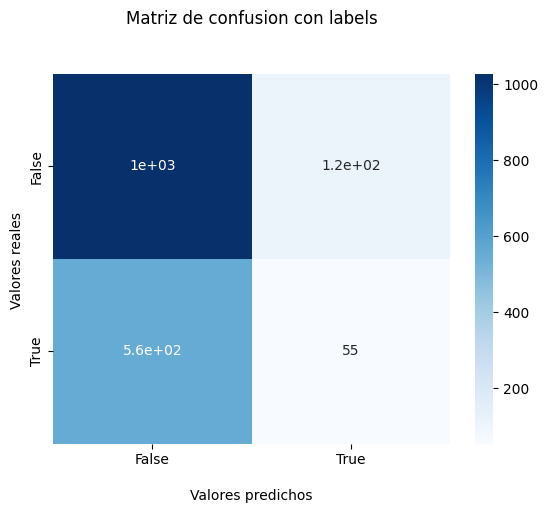

In [ ]:
#Importo la libreria
from sklearn.metrics import confusion_matrix
#Se crea la Matriz de confusion
cf_matrix = confusion_matrix(y_test, y_pred_log)# con los y-reales o verdaderos y los y-predichos.
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Asignacion de Etiquetas de nivel
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

En este gráfico, se observa que la prediccion de los valores verdaderos positivos (VVP) es de 55 valores, siendo esta muy baja, mientras que la predicción de los valores verdaderos negativos (VVN) es un poco mas elevada con 1000 valores,siendo el valor mayoritario de esta matriz.  Por otro lado, aprox 560 valores que son falsos negartivos (VFN). Mientras que el modelo predice que 120 valores son verdaderos cuando en realialidad son falsos (VFP).

### **Entrenamiento de Árbol de Decisión**


Para el entrenamiento del Árbol de Decisión utilizaremos la variable seleccionada con SFS.

In [ ]:
# Entrenamiento del modelo con las variables seleccionadas
tree_model.fit(X_train_sfs, y_train)

# Predicción en el conjunto de prueba (test)
y_pred_tree = tree_model.predict(X_test_sfs)

# Cálculo de la precisión del modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Precisión del Árbol de Decisión: {accuracy_tree:.4f}")

Precisión del Árbol de Decisión: 0.6172


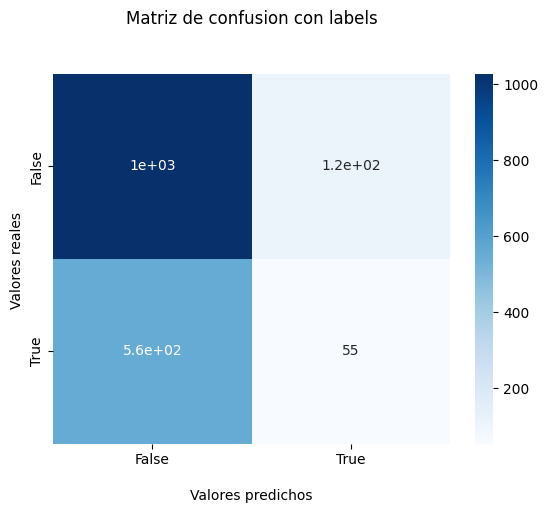

In [ ]:
#Importo la libreria
from sklearn.metrics import confusion_matrix
#Se crea la Matriz de confusion
cf_matrix = confusion_matrix(y_test, y_pred_tree)# con los y-reales o verdaderos y los y-predichos.
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Asignacion de Etiquetas de nivel
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()


Esta matriz de confusión es exactamente igual a la del modelo de regresión logística, donde la prediccion de los valores verdaderos positivos (VVP) es baja, solo 55 valores. Mientras que la predicción de los valores verdaderos negativos (VVN) es la mas alta (aprox 1000). Se observan 560 valores que son falsos negartivos (VFN)mientras que el modelo predice que 120 valores son verdaderos cuando en realialidad son falsos (VFP).

##**Comparacíon de modelos**

Se visualizan ambos resultados de la métrica de precisíon, para poder comparar los modelos.

In [ ]:
print(f"Precisión de la Regresión Logística: {accuracy_log:.4f}")
print(f"Precisión del Árbol de Decisión: {accuracy_tree:.4f}")

Precisión de la Regresión Logística: 0.6172
Precisión del Árbol de Decisión: 0.6172


En este caso ambos modelos tiene igual precisión, lo cual es sumamente raro.
La precisión se podria interpretar como que ambos modelos clasificaron adecuademante el 61,72% de los datos de prueba.

Se realizaron otras pruebas de testo de performance que se encuentran en el apartado de Anexo, ubicado al final del archivo. Donde se observa una menor precisión de ambos modelos respeto a esta versión optimizada, pero con diferencias entre si.

##**Interpretación gráfica de los modelos**

----
Para poder interpretar los modelos se deciden realizar distintas gráficas.

En el caso de Regresión Logística se utilizaran los coeficientes de regresión. Mientras que para el árbol de desición se utilizara justamente la grafica que le da nombre al modelo.

----

###**Interpretación modelo de Regresión Logística**


La Regresión Logística estima la probabilidad de pertenecer a una clase en función de las características.

*¿Cómo interpretamos los coeficientes?*

Cada coeficiente representa el impacto de la variable en la probabilidad de que el el paciente tenga riesgo de ataque cardíaco o IAM.

*   **Coeficientes positivos** → Aumentan la probabilidad de riesgo de IAM.
*   **Coeficientes negativos** → Disminuyen la probabilidad de riesgo de IAM.

Fuente: *SFS_Feature_selection_clasificacion.ipynb*, sección 7.2.

Primero se deben obtener los coeficientes de regresión del modelo entrenado

In [ ]:
coef_dict = dict(zip(X_train.columns, log_model.coef_[0]))  # Se realiza en forma de diccionario la obtención de los coeficientes de regresión
print("Coeficientes de la Regresión Logística:")
print(coef_dict)

Coeficientes de la Regresión Logística:
{'Age': -0.01865789461865247}


In [ ]:
# Luego se decide mostrar coeficientes ordenados por importancia
coef_df = pd.DataFrame.from_dict(coef_dict, orient='index', columns=['Coeficiente'])
coef_df = coef_df.sort_values(by="Coeficiente", ascending=False)
print('Coeficientes de la Regresión Logística:')
print(coef_df)

Coeficientes de la Regresión Logística:
     Coeficiente
Age    -0.018658


Esto se interpreta como que la edad disminuye la probabilidad de riesgo de padecer IAM. Ya en la preentrega anterior (Objetivo3), habiamos observado una correlación positiva entre el tabaquismo (caracteristica seleccionada por el modelo) y la edad.

###**Interpretación modelo de Árbol de Decisión**

Permite de forma visual ver como se clasifican las variables seleccinadas por SFS. Dado que al implementar este modelo en nuestros datos solo se selecciono la variable 'Smoking', el árbol es mas pequeño.

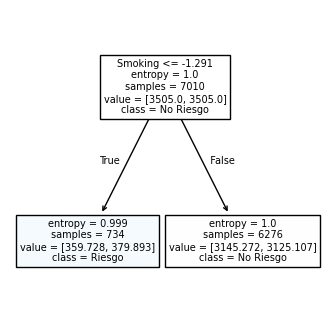

In [ ]:
# Se importa la libreria
from sklearn.tree import plot_tree

# Se realizala visualización del Árbol de Decisión
plt.figure(figsize=(4, 4))
plot_tree(tree_model,
          feature_names=selected_features,
          class_names=["No Riesgo", "Riesgo"],  # Etiquetas para la variable objetivo
          filled=True)

plt.show()

Se observa que como se seleccionó unicamente una variable como la mejor para este modelo, la representación gráfica de este modelo es reducida.
Dado el el valor de entropia es cercano a 1.0, esto evidencia que las clases estan desbalancedas o bastante mezcladas, es decir el nodo es impuro. Que existen mas datos (valores) para la clase sin riesgo que para con riesgo.
Ademas, se observan ambas clases.

##**Conclusión**

La precisión de ambos modelos utilizando la mejor performance en la selección de caracteristicas  (*best*), es la misma (0,6172 ó 61,72%), esto también se observa en las matrices de confucíon donde la cantidad de VVP es muy baja. Esto se podria deber entre otras cosas a el SFS eligió la misma característica como la mejor.

Por otro lado, se realizaron otras pruebas de testeo de performance, cambiando el hiperparámetro k_fearture de *best* a 5 (VER ANEXO). De esta forma se seleccionan las 5 mejores caracteristicas para entrenar el modelo. En este caso se obtuvieron valores de presión menores al anterior pero diferente entre los distintos modelos.
A pesar de que se obtuvo una precisión mayor para el modelo de árbol de decisión (0.5419 o 54,19%) respecto al modelo de regresión logística (0.5117 o 51.17%), este último presenta mas valores verdaderos positivos (VVP) y menor cantidad de valores falsos negativos (VFN). Es decir, predice menor cantidad de valores como negativos que en realidad son verdaderos, esto es importante en salud dado que los FN suelen no seguirse estudiando o no se interviene salvo que el paciente presente sintomas clinicos. En general se tiene a que los falsos negativos sean los menores posibles, sin incrementar en demasia los falsos positivos. Es por esto que se decide que el modelo de regresión logistica es el adecuando, aún cuando es el que menor precisión tiene.

Respecto a la regresión logística se puede observar las variables con coeficiente de regresión tanto positivas como negativas, que indican mayor o menor probalilidad de riesgo de IAM. Encontrandose que solo la presión sistólica aumentaria la probabilidad de riesgo, mientras que el colesterol, la edad el sexo y la presión diastólica las disminuirian.

Concluyendo, dado que la precisión del modelo no es muy buena (0,5117 ó 51,17%), se deberia probar realizando mejoras u optimización de los datos para que realmente sea útil y confiable los resultados brindados por el modelo, a fin de poder establecerse las caracteristicas relevantes como indicadores de riesgo para la prevención de IAM.

## **Anexo: Testo de performance**

En este anexo se incluiran la pruebas que se realizaron para evaluar la performance de ambos modelos, principalmente cambiando el k_feature en la seleccion de las mejores caracteriticas.

###**A-SFS para modelo de Regresíon logística**

En este caso utilizan un k_features de 5, por lo que se seleccionaran las 5 mejores característica. Se nombran las variable selecionadas como : selected_features_log_2, para diferenciarla de la anterior.

In [ ]:
# Este código permite que se aplique SFS para la Regresión Logística
sfs_log = SFS(log_model,
              k_features=5, # Al colocar esta opcion busca las 5 mejores caracteristicas
              forward=True, # realiza la selección hacia adelante
              floating=True, # Puede eliminar variables no útiles
              scoring='accuracy',  # métrica del modelo
              cv=5) # realiza la validación cruzada 5 veces.

# Se debe ajustar el SFS, ultilizando el siguiente código
sfs_log.fit(X_train_scaled, y_train)

# Finalmente, se aplica el código para obtener las mejores características
selected_features_log_2 = list(sfs_log.k_feature_names_)
print("Variables seleccionadas (Regresión Logística):", selected_features_log_2)

Variables seleccionadas (Regresión Logística): ['Family History', 'Smoking', 'Alcohol Consumption', 'Sedentary Hours Per Day', 'Country']


A diferencia de cuando se utiliza *best*, con esta opción de hiperparametro (k_features = 5), además de *Smoking* existen otras caracteristicas relevantes para el modelo.

Una vez establecidas cuales son las mejores características para el modelo, se deben filtar los datos para dichas características:

In [ ]:
# Filtrado de datos con las mejores características
X_train_sfs_log_2 = X_train_scaled[selected_features_log_2]
X_test_sfs_log_2 = X_test_scaled[selected_features_log_2]

Se testea que que tanto los valores de training como los de test tengan la misma cantidad de columnas

In [ ]:
print(X_train_sfs_log_2.shape, X_test_sfs_log_2.shape)
print(X_train_sfs_log_2.columns)
print(X_test_sfs_log_2.columns)

(7010, 5) (1753, 5)
Index(['Family History', 'Smoking', 'Alcohol Consumption',
       'Sedentary Hours Per Day', 'Country'],
      dtype='object')
Index(['Family History', 'Smoking', 'Alcohol Consumption',
       'Sedentary Hours Per Day', 'Country'],
      dtype='object')


Se observa que tienen la misma cantidad de columnas.

###**A-SFS para modelo de Árbol de Decisión**

Al igual que con el modelo anterior, se utiliza un k_feature de 5.

In [ ]:
# Este código permite que se aplique SFS para el Árbol de Decisión
sfs = SFS(tree_model,
          k_features=5, # Al colocar esta opcion busca las 5 mejores caracteristicas
          forward=True,
          floating=True,
          scoring='accuracy',
          cv=5)

# Se debe ajustar el SFS, ultilizando el siguiente código
sfs.fit(X_train_scaled_tree, y_train)

# Finalmente, se aplica el código para obtener las mejores características
selected_features_2 = list(sfs.k_feature_names_)
print("Variables seleccionadas:", selected_features_2)

Variables seleccionadas: ['Sex', 'Smoking', 'Obesity', 'Medication Use', 'Income']


A diferencia de cuando se utiliza *best*, con esta opción de hiperparametro (k_features = 5), además de *Smoking* existen otras caracteristicas relevantes para el modelo. Que a su vez algunas son distintas respecto al modelo de regresión logística.

Una vez establecidas cuales son las mejores características para el modelo, se deben filtar los datos para dichas características:

In [ ]:
X_train_sfs_2 = X_train_scaled_tree[selected_features_2]
X_test_sfs_2 = X_test_scaled_tree[selected_features_2]

Se testea que que tanto los valores de training como los de test tengan la misma cantidad de columnas

In [ ]:
print(X_train_sfs_2.shape, X_test_sfs_2.shape)
print(X_train_sfs_2.columns)
print(X_test_sfs_2.columns)

(7010, 5) (1753, 5)
Index(['Sex', 'Smoking', 'Obesity', 'Medication Use', 'Income'], dtype='object')
Index(['Sex', 'Smoking', 'Obesity', 'Medication Use', 'Income'], dtype='object')


#####**Característica seleccionadas por SFS**

Se identifican cuales son las 5 mejores caracteristicas para cada modelo

In [ ]:
print("Variables seleccionadas (Regresión Logística):", selected_features_log_2)
print("Variables seleccionadas (Árbol de Decisión):", selected_features_2)

Variables seleccionadas (Regresión Logística): ['Family History', 'Smoking', 'Alcohol Consumption', 'Sedentary Hours Per Day', 'Country']
Variables seleccionadas (Árbol de Decisión): ['Sex', 'Smoking', 'Obesity', 'Medication Use', 'Income']


### **A-Entrenamiento de la Regresión Logística**


Para el entrenamiento de la regresión logística utilizaremos las variables seleccionadas con SFS.

In [ ]:
# Entrenamiento del modelo con las variables seleccionadas
log_model.fit(X_train_sfs_log_2, y_train)

# Predicción en el conjunto de prueba (test)
y_pred_log_2 = log_model.predict(X_test_sfs_log_2)

# Cálculo de la precisión del modelo
accuracy_log_2 = accuracy_score(y_test, y_pred_log_2)
print(f"Precisión de la Regresión Logística: {accuracy_log_2:.4f}")

Precisión de la Regresión Logística: 0.5117


In [ ]:
y_pred_log_2

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
log_model.predict_proba(X_test_sfs_log_2)

array([[0.50719419, 0.49280581],
       [0.49907684, 0.50092316],
       [0.50495708, 0.49504292],
       ...,
       [0.50636993, 0.49363007],
       [0.47621209, 0.52378791],
       [0.51316204, 0.48683796]])

Se grafica la matriz de confusión.

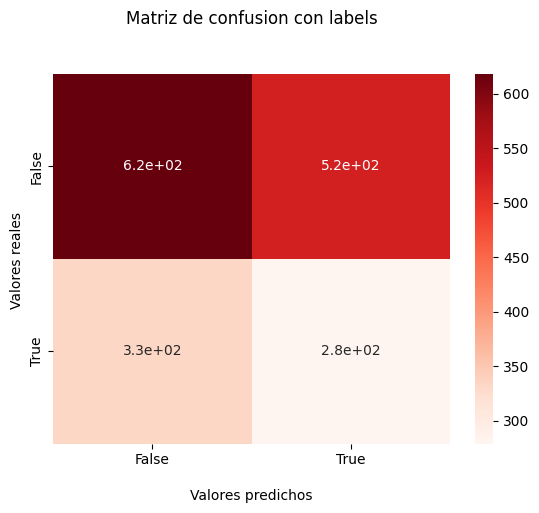

In [ ]:
#Importo la libreria
from sklearn.metrics import confusion_matrix
#Se crea la Matriz de confusion
cf_matrix = confusion_matrix(y_test, y_pred_log_2)# con los y-reales o verdaderos y los y-predichos.
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Asignacion de Etiquetas de nivel
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

En este gráfico, se observa que la prediccion de los valores verdaderos positivos (VVP) es de 280 valores, mientras que la predicción de los valores verdaderos negativos (VVN) es un poco mas elevada con 620 valores. Por otro lado, aprox 330 valores que son falsos negartivos (VFN). Mientras que el modelo predice que 520 valores son verdaderos cuando en realialidad son falsos (VFP), siendo el valor mayoritario de esta matriz.

### **A-Entrenamiento de Árbol de Decisión**


Para el entrenamiento del Árbol de Decisión utilizaremos la variable seleccionada con SFS.

In [ ]:
# Entrenamiento del modelo con las variables seleccionadas
tree_model.fit(X_train_sfs_2, y_train)

# Predicción en el conjunto de prueba (test)
y_pred_tree_2 = tree_model.predict(X_test_sfs_2)

# Cálculo de la precisión del modelo
accuracy_tree_2 = accuracy_score(y_test, y_pred_tree_2)
print(f"Precisión del Árbol de Decisión: {accuracy_tree_2:.4f}")

Precisión del Árbol de Decisión: 0.5414


Se crea la matriz de confusión

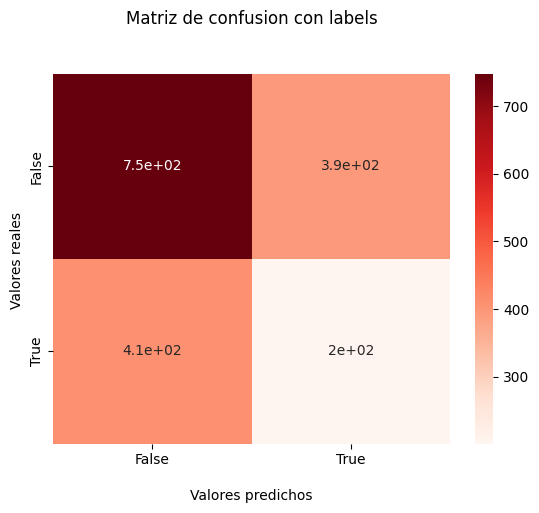

In [ ]:
#Importo la libreria
from sklearn.metrics import confusion_matrix
#Se crea la Matriz de confusion
cf_matrix = confusion_matrix(y_test, y_pred_tree_2)# con los y-reales o verdaderos y los y-predichos.
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Asignacion de Etiquetas de nivel
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

En este caso, la  prediccion de los valores verdaderos positivos (VVP) es de 200 valores, mientras que la predicción de los valores verdaderos negativos (VVN) es la mas elevada con 750 valores. Se observan aprox 410 valores que son falsos negartivos (VFN) mientras que el modelo predice que 390 valores son verdaderos cuando en realialidad son falsos (VFP).

##**A-Comparacíon de modelos**

Se visualizan ambos resultados de la métrica de precisíon, para poder comparar los modelos.

In [ ]:
print(f"Precisión de la Regresión Logística: {accuracy_log_2:.4f}")
print(f"Precisión del Árbol de Decisión: {accuracy_tree_2:.4f}")

Precisión de la Regresión Logística: 0.5117
Precisión del Árbol de Decisión: 0.5414


En este caso, al contrario de lo pesado inicialmente, el árbol de decisión tiene una precisión superior al del modelo de regresión logística.
La precisión para el modelo de árbol de decisión se podria interpretar como que permite clasificar adecuademante el 54,19% de los datos de prueba. Mientras que el modelo de regresión logística solo 51,17%.

###**A-Interpretación modelo de Regresión Logística**


La Regresión Logística estima la probabilidad de pertenecer a una clase en función de las características.

*¿Cómo interpretamos los coeficientes?*

Cada coeficiente representa el impacto de la variable en la probabilidad de que el el paciente tenga riesgo de ataque cardíaco o IAM.

*   **Coeficientes positivos** → Aumentan la probabilidad de riesgo de IAM.
*   **Coeficientes negativos** → Disminuyen la probabilidad de riesgo de IAM.

Fuente: *SFS_Feature_selection_clasificacion.ipynb*, sección 7.2.

Primero se deben obtener los coeficientes de regresión del modelo entrenado

In [ ]:
coef_dict_2 = dict(zip(X_train.columns, log_model.coef_[0]))  # Se realiza en forma de diccionario la obtención de los coeficientes de regresión
print("Coeficientes de la Regresión Logística:")
print(coef_dict_2)

Coeficientes de la Regresión Logística:
{'Age': -0.008459985346920176, 'Sex': -0.018092640253458022, 'Cholesterol': -0.03488142833631118, 'Systolic_Pressure': 0.008762663059970779, 'Diastolic_Pressure': -0.00376574004084339}


In [ ]:
# Luego se decide mostrar coeficientes ordenados por importancia
coef_df_2 = pd.DataFrame.from_dict(coef_dict_2, orient='index', columns=['Coeficiente'])
coef_df_2 = coef_df_2.sort_values(by="Coeficiente", ascending=False)
print('Coeficientes de la Regresión Logística:')
print(coef_df_2)

Coeficientes de la Regresión Logística:
                    Coeficiente
Systolic_Pressure      0.008763
Diastolic_Pressure    -0.003766
Age                   -0.008460
Sex                   -0.018093
Cholesterol           -0.034881


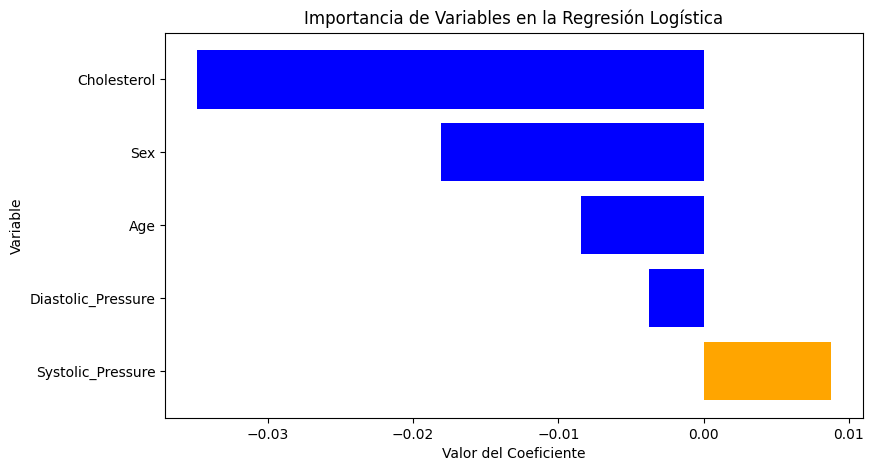

In [ ]:
# Finalmente se grafican  los coeficientes
plt.figure(figsize=(9, 5))
plt.barh(coef_df_2.index, coef_df_2['Coeficiente'], color=['blue' if x < 0 else 'orange' for x in coef_df_2['Coeficiente']])
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Variable")
plt.title("Importancia de Variables en la Regresión Logística")
plt.show()

Se puede observar que las barras color naranja, correspondientes a las variables con coeficiente de regresion logística positivos, aumentan el riesgo de IAM, estos son la presión diastólica, la edad, el sexo y el colesterol. Mientras que las barras de color azul, correspondientes a las variables con coeficiente de regresion logística negativos, disminuyen el riesgo de IAM, siendo en este caso la presión sistólica.

###**A-Interpretación modelo de Árbol de Decisión**

Permite de forma visual ver como se clasifican las variables seleccinadas por SFS.

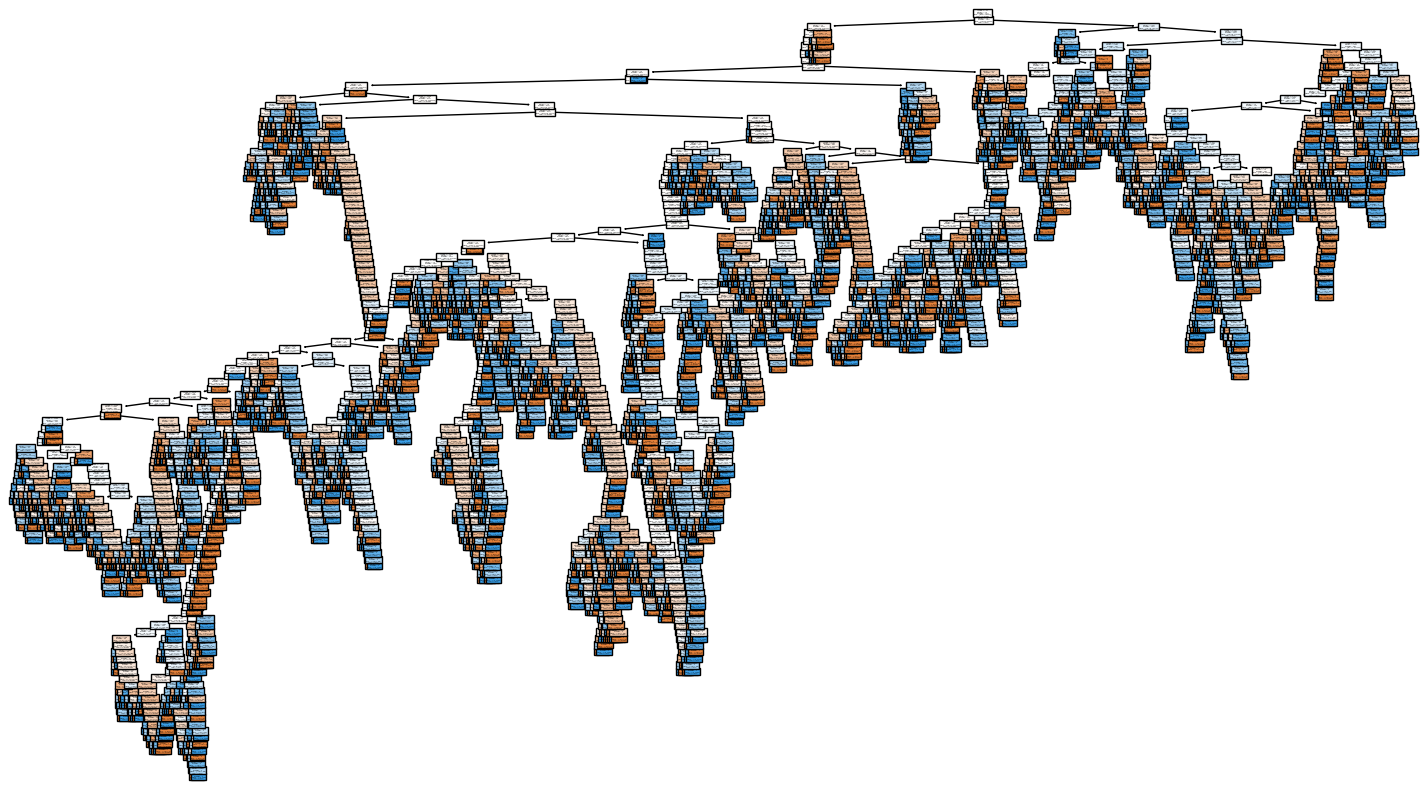

In [ ]:
# Se importa la libreria
from sklearn.tree import plot_tree

# Se realizala visualización del Árbol de Decisión
plt.figure(figsize=(18, 10))
plot_tree(tree_model,
          feature_names=selected_features_2,
          class_names=["No Riesgo", "Riesgo"],  # Etiquetas para la variable objetivo
          filled=True)

plt.show()

Se puede observar la ilegibilidad del  dada la cantidad de variables seleccionadas en SFS.

##**A-Conclusión**

A pesar de que se obtuvo una presición mayor para el modelo de árbol de decisión (0.5419 o 54,19%) respecto al modelo de regresión logística (0.5117 o 51.17%), este uúltimo presenta mas valores verdaderos positivos (VVP) y menor cantidad de valores falsos negativos (VFN). Es decir, predice menor cantidad de valores como negativos que en realidad son verdaderos, esto es importante en salud dado que los FN suelen no seguirse estudiando o no se interviene salvo que el paciente presente sintomas clinicos. En general se tiene a que los falsos negativos sean los menores posibles, sin incrementar en demasia los falsos positivos. Es por esto que se decide que el modelo de regresión logistica es el adecuando.

Respecto a la regresión logística se puede observar las variables con coeficiente de regresión tanto positivas como negativas, que indican mayor o menor probalilidad de riesgo de IAM. Encontrandose que solo la presión sistólica aumentaria la probabilidad de riesgo, mientras que el colesterol, la edad y el sexo las disminuirian.

Dado que la precisión del modelo no es muy buena (51,17%), se deberia probar realizando mejoras u optimizacion de los datos para que realmente sea útil y confiable los resultados brindados por el modelo, a fin de poder establecerse las caracteristicas relevantes como indicadores de riesgo para la prevención de IAM.